In [189]:
### Utility Functions
import pandas as pd
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows


In [ ]:
# Creating the Schools table

In [3]:
filename = 'student-por.csv'
SchoolName = []
i = 0
header = 0
with open(filename) as file:
    for line in file:
        if i == 0:
            header = line.strip().split(',')
#             print(header)
            i += 1
            continue
        sch = str(line.strip().split(',')[0])
        if (sch,) not in SchoolName:
            SchoolName.append((sch,))

In [4]:
SchoolName

[('GP',), ('MS',)]

In [43]:
normalized_database_filename = 'NormGroupProj'
norm = create_connection(normalized_database_filename)

In [44]:
create_table_school = """CREATE TABLE [Schools] (
    [SchoolID] INTEGER NOT NULL PRIMARY KEY,
    [SchoolName] VARCHAR(2) NOT NULL
);"""
create_table(norm, create_table_school, "Schools")
with norm:
    cur = norm.cursor()
    cur.executemany("INSERT INTO Schools(SchoolName) VALUES(?)", SchoolName)

FOREIGN KEY constraint failed
table [Schools] already exists


In [45]:
# Schools table dict FK

In [46]:
school_dict = {}
school_sql_data = execute_sql_statement("SELECT * FROM SCHOOLS;", norm)
for school_line in school_sql_data:
    school_dict[school_line[1]] = school_line[0]
school_dict

{'GP': 3, 'MS': 4}

In [47]:
# Creating the Students table

In [48]:
StudentsData = []
i = 0
header = 0
with open(filename) as file:
    for line in file:
        if i == 0:
            header = line.strip().split(',')
#             print(header)
            i += 1
            continue
        lineStripped = line.strip().split(',')
        SchoolID = school_dict[lineStripped[0]]
        Sex = lineStripped[1]
        Age = lineStripped[2]
        Address = lineStripped[3]
        FamSize = lineStripped[4]
        PStatus = lineStripped[5]
        Guardian = lineStripped[11]
#         print(SchoolID, Sex, Age, Address, FamSize, PStatus, Guardian)
        StudentsData.append((SchoolID, Sex, Age, Address, FamSize, PStatus, Guardian))
#         break

In [49]:
# StudentsData

In [50]:
create_table_students = """CREATE TABLE [Students] (
    [StudentID] INTEGER NOT NULL PRIMARY KEY,
    [SchoolID] INTEGER NOT NULL,
    [Sex] INTEGER NOT NULL,
    [Age] INTEGER,
    [AddressType] VARCHAR(1) NOT NULL,
    [FamSize] VARCHAR(3) NOT NULL,
    [PStatus] VARCHAR(1) NOT NULL,
    [Guardian] VARCHAR NOT NULL,
    FOREIGN KEY(SchoolID) REFERENCES Schools(SchoolID)
);"""
create_table(norm, create_table_students, "Students")
with norm:
    cur = norm.cursor()
    cur.executemany("INSERT INTO Students(SchoolID, Sex, Age, AddressType, FamSize, PStatus, Guardian) VALUES(?,?,?,?,?,?,?);", StudentsData)

FOREIGN KEY constraint failed
table [Students] already exists


In [51]:
S = execute_sql_statement("SELECT * FROM Students;", norm)
len(S)

1298

In [52]:
# -> Parents Data

In [53]:
ParentsData = []
i = 0
header = 0
with open(filename) as file:
    for line in file:
        if i == 0:
            header = line.strip().split(',')
#             print(header)
            i += 1
            continue
#         print(line.strip().split(','))
        Medu = int(line.strip().split(',')[6])
        Fedu = int(line.strip().split(',')[7])
        Mjob = str(line.strip().split(',')[8])
        Fjob = str(line.strip().split(',')[9])
#         print(Medu, Fedu, Mjob, Fjob)
        ParentsData.append((i, Medu, Fedu, Mjob, Fjob))
        i += 1

In [54]:
create_table_parents = """CREATE TABLE [Parents] (
    [ParentID] INTEGER NOT NULL PRIMARY KEY,
    [StudentID] INTEGER NOT NULL,
    [Medu] INTEGER NOT NULL,
    [Fedu] INTEGER NOT NULL,
    [Mjob] VARCHAR NOT NULL,
    [Fjob] VARCHAR NOT NULL,
    FOREIGN KEY(StudentID) REFERENCES Students(StudentID)
);"""
create_table(norm, create_table_parents, "Parents")
with norm:
    cur = norm.cursor()
    cur.executemany("INSERT INTO Parents(StudentID, Medu, Fedu, Mjob, Fjob) VALUES(?,?,?,?,?);", ParentsData)

In [55]:
S = execute_sql_statement("SELECT * FROM Parents;", norm)

In [56]:
len(S)

649

In [57]:
# -> Academic Info

In [58]:
Academicinfo = []
i = 0
header = 0
with open(filename) as file:
    for line in file:
        if i == 0:
            header = line.strip().split(',')
#             print(header)
            i += 1
            continue
        line = line.strip().split(',')
        studentid = i
        StudyTime = line[13]
        Failures = line[14]
        schoolsup = line[15]
        FamSup = line[16]
        PaidClasses = line[17]
        Activities = line[18]
        Nursery = line[19]
        Higher = line[20]
        Internet = line[21]
        Romantic = line[22]
        ReasonForChoosingSchool = line[10]
        Academicinfo.append((studentid, StudyTime, Failures, schoolsup, FamSup, PaidClasses, Activities, Nursery, Higher, Internet, Romantic, ReasonForChoosingSchool))
#         print(studentid, StudyTime, Failures, schoolsup, FamSup, PaidClasses, Activities, Nursery, Higher, Internet, Romantic, ReasonForChoosingSchool)
        i += 1

In [59]:
create_table_academic = """CREATE TABLE [Academic] (
    [AcademicID] INTEGER NOT NULL PRIMARY KEY,
    [StudentID] INTEGER NOT NULL,
    [StudyTime] INTEGER NOT NULL,
    [Failures] INTEGER NOT NULL,
    [SchoolSup] TEXT NOT NULL,
    [FamSup] VARCHAR NOT NULL,
    [PaidClasses] VARCHAR NOT NULL,
    [Activities] VARCHAR NOT NULL,
    [Nursery] VARCHAR NOT NULL,
    [Higher] VARCHAR NOT NULL,
    [Internet] VARCHAR NOT NULL,
    [Romantic] VARCHAR NOT NULL,
    [ReasonForChoosingSchool] VARCHAR NOT NULL,
    FOREIGN KEY(StudentID) REFERENCES Students(StudentID),
    CONSTRAINT Failures_range CHECK (Failures BETWEEN 0 AND 3),
    CONSTRAINT studytime_range CHECK (StudyTime BETWEEN 1 AND 4)
);"""
create_table(norm, create_table_academic, "Academic")
with norm:
    cur = norm.cursor()
    cur.executemany("INSERT INTO Academic(StudentID, StudyTime, Failures, SchoolSup, FamSup, PaidClasses, Activities, Nursery, Higher, Internet, Romantic, ReasonForChoosingSchool) VALUES(?,?,?,?,?,?,?,?,?,?,?,?);", Academicinfo)

In [60]:
S = execute_sql_statement("SELECT * FROM Academic;", norm)
len(S)

649

In [61]:
# -> Student Lifestyle Info

In [62]:
StudentLifestyle = []
i = 0
header = 0
with open(filename) as file:
    for line in file:
        if i == 0:
            header = line.strip().split(',')
#             print(header)
            i += 1
            continue
        line = line.strip().split(',')
        studentid = i
        traveltime = line[12]
        FreeTime = line[24]
        GoOut = line[25]
        Dalc = line[26]
        Walc = line[27]
        Health = line[28]
        StudentLifestyle.append((studentid, traveltime, FreeTime, GoOut, Dalc, Walc, Health))
        i += 1
#         break

In [63]:
create_table_StudentLifestyle = """CREATE TABLE [Studentlifestyle] (
    [StudentlifestyleID] INTEGER NOT NULL PRIMARY KEY,
    [StudentID] INTEGER NOT NULL,
    [TravelTime] INTEGER NOT NULL,
    [FreeTime] INTEGER NOT NULL,
    [GoOut] TEXT NOT NULL,
    [Dalc] VARCHAR NOT NULL,
    [Walc] VARCHAR NOT NULL,
    [Health] VARCHAR NOT NULL,
    FOREIGN KEY(StudentID) REFERENCES Students(StudentID),
    CONSTRAINT TravelTime_range CHECK (TravelTime BETWEEN 1 AND 4),
    CONSTRAINT FreeTime_range CHECK (FreeTime BETWEEN 1 AND 5),
    CONSTRAINT GoOut_range CHECK (GoOut BETWEEN 1 AND 5),
    CONSTRAINT Dalc_range CHECK (Dalc BETWEEN 1 AND 5),
    CONSTRAINT Walc_range CHECK (Walc BETWEEN 1 AND 5),
    CONSTRAINT Health_range CHECK (Health BETWEEN 1 AND 5)
);"""
create_table(norm, create_table_StudentLifestyle, "Studentlifestyle")
with norm:
    cur = norm.cursor()
    cur.executemany("INSERT INTO Studentlifestyle(StudentID, TravelTime, FreeTime, GoOut, Dalc, Walc, Health) VALUES(?,?,?,?,?,?,?);", StudentLifestyle)

In [64]:
S = execute_sql_statement("SELECT * FROM Studentlifestyle;", norm)
len(S)

649

In [65]:
# ---> Performance Table

In [66]:
Performance = []
i = 0
header = 0
with open(filename) as file:
    for line in file:
        if i == 0:
            header = line.strip().split(',')
#             print(header)
            i += 1
            continue
        line = line.strip().split(',')
        studentid = i
        G1 = line[30]
        G2 = line[31]
        G3 = line[32]
#         print(G1, G2, G3)
        Performance.append((studentid, G1, G2, G3))
        i += 1

In [67]:
create_table_performance = """CREATE TABLE [Performance] (
    [PerformanceID] INTEGER NOT NULL PRIMARY KEY,
    [StudentID] INTEGER NOT NULL,
    [G1] INTEGER,
    [G2] INTEGER,
    [G3] INTEGER,
    CONSTRAINT G1_range CHECK (G1 BETWEEN 0 AND 20),
    CONSTRAINT G2_range CHECK (G2 BETWEEN 0 AND 20),
    CONSTRAINT G3_range CHECK (G3 BETWEEN 0 AND 20),
    FOREIGN KEY(StudentID) REFERENCES Students(StudentID)
    );"""
create_table(norm, create_table_performance, "Performance")
# create_table(norm, create_table_performance, "Performance")
with norm:
    cur = norm.cursor()
    cur.executemany("INSERT INTO Performance(StudentID, G1, G2, G3) VALUES(?,?,?,?);", Performance)

In [68]:
len(execute_sql_statement("SELECT * FROM Performance;", norm))

649

In [69]:
# --> Attendance Table

In [70]:
Attendance = []
i = 0
header = 0
with open(filename) as file:
    for line in file:
        if i == 0:
            header = line.strip().split(',')
#             print(header)
            i += 1
            continue
        line = line.strip().split(',')
        studentid = i
        absences = line[29]
#         print(G1, G2, G3)
        Attendance.append((studentid, absences))
        i += 1

In [71]:
create_table_attendance = """CREATE TABLE [Attendance] (
    [AttendanceID] INTEGER NOT NULL PRIMARY KEY,
    [StudentID] INTEGER NOT NULL,
    [Absences] INTEGER,
    CONSTRAINT Absences_range CHECK (Absences BETWEEN 0 AND 93),
    FOREIGN KEY(StudentID) REFERENCES Students(StudentID)
    );"""
create_table(norm, create_table_attendance, "Attendance")
# create_table(norm, create_table_performance, "Performance")
with norm:
    cur = norm.cursor()
    cur.executemany("INSERT INTO Attendance(StudentID, Absences) VALUES(?,?);", Attendance)

In [72]:
len(execute_sql_statement("SELECT * FROM Attendance;", norm))

649

In [73]:
# ----> Viewing Data

In [74]:
pd.read_sql("SELECT * FROM Schools;", norm)

,SchoolID,SchoolName
0,1,GP
1,2,MS
2,3,GP
3,4,MS


In [75]:
pd.read_sql("SELECT * FROM Students;", norm)

,StudentID,SchoolID,Sex,Age,AddressType,FamSize,PStatus,Guardian
0,1,1,F,18,U,GT3,A,mother
1,2,1,F,17,U,GT3,T,father
2,3,1,F,15,U,LE3,T,mother
3,4,1,F,15,U,GT3,T,mother
4,5,1,F,16,U,GT3,T,father
...,...,...,...,...,...,...,...,...
1293,1294,4,F,19,R,GT3,T,mother
1294,1295,4,F,18,U,LE3,T,mother
1295,1296,4,F,18,U,GT3,T,mother
1296,1297,4,M,17,U,LE3,T,mother


In [76]:
pd.read_sql("SELECT * FROM Parents;", norm)

,ParentID,StudentID,Medu,Fedu,Mjob,Fjob
0,1,1,4,4,at_home,teacher
1,2,2,1,1,at_home,other
2,3,3,1,1,at_home,other
3,4,4,4,2,health,services
4,5,5,3,3,other,other
...,...,...,...,...,...,...
644,645,645,2,3,services,other
645,646,646,3,1,teacher,services
646,647,647,1,1,other,other
647,648,648,3,1,services,services


In [77]:
pd.read_sql("SELECT * FROM Academic;", norm)

,AcademicID,StudentID,StudyTime,Failures,SchoolSup,FamSup,PaidClasses,Activities,Nursery,Higher,Internet,Romantic,ReasonForChoosingSchool
0,1,1,2,0,yes,no,no,no,yes,yes,no,no,course
1,2,2,2,0,no,yes,no,no,no,yes,yes,no,course
2,3,3,2,0,yes,no,no,no,yes,yes,yes,no,other
3,4,4,3,0,no,yes,no,yes,yes,yes,yes,yes,home
4,5,5,2,0,no,yes,no,no,yes,yes,no,no,home
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,645,645,3,1,no,no,no,yes,no,yes,yes,no,course
645,646,646,2,0,no,yes,no,no,yes,yes,yes,no,course
646,647,647,2,0,no,no,no,yes,yes,yes,no,no,course
647,648,648,1,0,no,no,no,no,no,yes,yes,no,course


In [78]:
pd.read_sql("SELECT * FROM Studentlifestyle;", norm)

,StudentlifestyleID,StudentID,TravelTime,FreeTime,GoOut,Dalc,Walc,Health
0,1,1,2,3,4,1,1,3
1,2,2,1,3,3,1,1,3
2,3,3,1,3,2,2,3,3
3,4,4,1,2,2,1,1,5
4,5,5,1,3,2,1,2,5
...,...,...,...,...,...,...,...,...
644,645,645,1,4,2,1,2,5
645,646,646,1,3,4,1,1,1
646,647,647,2,1,1,1,1,5
647,648,648,2,4,5,3,4,2


In [79]:
pd.read_sql("SELECT * FROM Performance;", norm)

,PerformanceID,StudentID,G1,G2,G3
0,1,1,0,11,11
1,2,2,9,11,11
2,3,3,12,13,12
3,4,4,14,14,14
4,5,5,11,13,13
...,...,...,...,...,...
644,645,645,10,11,10
645,646,646,15,15,16
646,647,647,11,12,9
647,648,648,10,10,10


In [80]:
pd.read_sql("SELECT * FROM Attendance;", norm)

,AttendanceID,StudentID,Absences
0,1,1,4
1,2,2,2
2,3,3,6
3,4,4,0
4,5,5,0
...,...,...,...
644,645,645,4
645,646,646,4
646,647,647,6
647,648,648,6


### Retriving the data into pandas using sql join statements

In [182]:
def retrive_all_data():
    retrive_sql = """
    select * from 
    Academic a
    join Attendance at on a.StudentID = at.StudentID
    join Parents p on p.StudentID = a.StudentID
    join Performance per on a.StudentID = per.StudentID
    join Studentlifestyle sl on a.StudentID = sl.StudentID 
    join (Students st join Schools sc on st.SchoolID = sc.SchoolID) on a.StudentID = st.StudentID
    """
    return retrive_sql
    

In [326]:
test_con = create_connection(normalized_database_filename)

df = pd.read_sql_query(retrive_all_data(), test_con)

test_con.close()
df

,AcademicID,StudentID,StudyTime,Failures,SchoolSup,FamSup,PaidClasses,Activities,Nursery,Higher,...,StudentID,SchoolID,Sex,Age,AddressType,FamSize,PStatus,Guardian,SchoolID:1,SchoolName
0,1,1,2,0,yes,no,no,no,yes,yes,...,1,1,F,18,U,GT3,A,mother,1,GP
1,2,2,2,0,no,yes,no,no,no,yes,...,2,1,F,17,U,GT3,T,father,1,GP
2,3,3,2,0,yes,no,no,no,yes,yes,...,3,1,F,15,U,LE3,T,mother,1,GP
3,4,4,3,0,no,yes,no,yes,yes,yes,...,4,1,F,15,U,GT3,T,mother,1,GP
4,5,5,2,0,no,yes,no,no,yes,yes,...,5,1,F,16,U,GT3,T,father,1,GP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,645,645,3,1,no,no,no,yes,no,yes,...,645,2,F,19,R,GT3,T,mother,2,MS
645,646,646,2,0,no,yes,no,no,yes,yes,...,646,2,F,18,U,LE3,T,mother,2,MS
646,647,647,2,0,no,no,no,yes,yes,yes,...,647,2,F,18,U,GT3,T,mother,2,MS
647,648,648,1,0,no,no,no,no,no,yes,...,648,2,M,17,U,LE3,T,mother,2,MS


In [118]:
len(df.columns)

45

In [119]:
df = df.loc[:, ~df.columns.duplicated()]

In [120]:
display(df.drop_duplicates())

,AcademicID,StudentID,StudyTime,Failures,SchoolSup,FamSup,PaidClasses,Activities,Nursery,Higher,...,Health,SchoolID,Sex,Age,AddressType,FamSize,PStatus,Guardian,SchoolID:1,SchoolName
0,1,1,2,0,yes,no,no,no,yes,yes,...,3,1,F,18,U,GT3,A,mother,1,GP
1,2,2,2,0,no,yes,no,no,no,yes,...,3,1,F,17,U,GT3,T,father,1,GP
2,3,3,2,0,yes,no,no,no,yes,yes,...,3,1,F,15,U,LE3,T,mother,1,GP
3,4,4,3,0,no,yes,no,yes,yes,yes,...,5,1,F,15,U,GT3,T,mother,1,GP
4,5,5,2,0,no,yes,no,no,yes,yes,...,5,1,F,16,U,GT3,T,father,1,GP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,645,645,3,1,no,no,no,yes,no,yes,...,5,2,F,19,R,GT3,T,mother,2,MS
645,646,646,2,0,no,yes,no,no,yes,yes,...,1,2,F,18,U,LE3,T,mother,2,MS
646,647,647,2,0,no,no,no,yes,yes,yes,...,5,2,F,18,U,GT3,T,mother,2,MS
647,648,648,1,0,no,no,no,no,no,yes,...,2,2,M,17,U,LE3,T,mother,2,MS


In [121]:
check_df = pd.read_csv(r"C:\Users\Tenzin Lhakpa\Desktop\final project\student-por.csv")

In [124]:
check_df.columns, df.columns

(Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
        'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
        'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
        'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
        'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'AVGGrade'],
       dtype='object'),
 Index(['AcademicID', 'StudentID', 'StudyTime', 'Failures', 'SchoolSup',
        'FamSup', 'PaidClasses', 'Activities', 'Nursery', 'Higher', 'Internet',
        'Romantic', 'ReasonForChoosingSchool', 'AttendanceID', 'Absences',
        'ParentID', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'PerformanceID', 'G1', 'G2',
        'G3', 'StudentlifestyleID', 'TravelTime', 'FreeTime', 'GoOut', 'Dalc',
        'Walc', 'Health', 'SchoolID', 'Sex', 'Age', 'AddressType', 'FamSize',
        'PStatus', 'Guardian', 'SchoolID:1', 'SchoolName'],
       dtype='object'))

In [197]:
import numpy as np
df['AvgGrade'] = round((df['G1'].fillna(0) + df['G2'].fillna(0) + df['G3'].fillna(0)) / 3, 1)


In [198]:
df['AvgGrade'] 

0       7.3
1      10.3
2      12.3
3      14.0
4      12.3
       ... 
644    10.3
645    15.3
646    10.7
647    10.0
648    10.7
Name: AvgGrade, Length: 649, dtype: float64

### Feature Selection 

In [297]:
#Dropping G1, G2, and G3 aswell becuse they are outlier

X_train = df.drop(['AvgGrade', 'G1', 'G2', 'G3'], axis = 1)
y_train = df['AvgGrade']


from sklearn.preprocessing import LabelEncoder

# Encode categorical columns 
for i in range(len(X_train.columns)):
    if X_train.iloc[:, i].dtype == 'object': 
        X_train.iloc[:, i] = LabelEncoder().fit_transform(X_train.iloc[:, i])

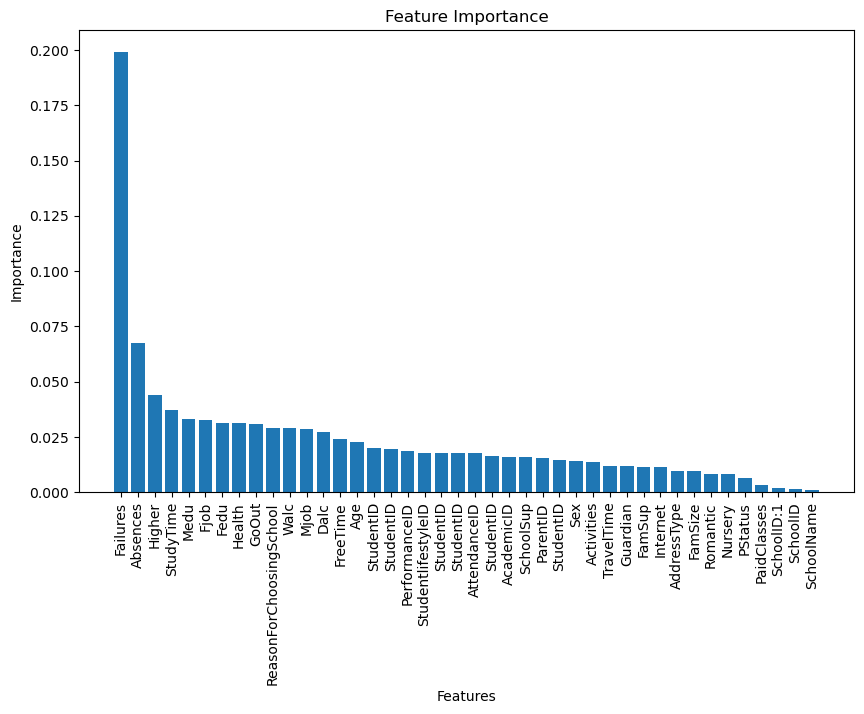

In [298]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

#Assuming X_train and y_train are your training features and target
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

#Get feature importances from the trained model
importances = model.feature_importances_

#Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation ='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

#### Considering only the top 10 variables.

In [312]:
X_train.columns[indices][0:11]

Index(['Failures', 'Absences', 'Higher', 'StudyTime', 'Medu', 'Fjob', 'Fedu',
       'Health', 'GoOut', 'ReasonForChoosingSchool', 'Walc'],
      dtype='object')

In [309]:
top_10_columns = X_train.columns[indices][0:10]
top_10_df = X_train[top_10_columns]
top_10_df['AvgGrade'] = df['AvgGrade']

C:\Users\Tenzin Lhakpa\AppData\Local\Temp\ipykernel_4024\2356564866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_df['AvgGrade'] = df['AvgGrade']


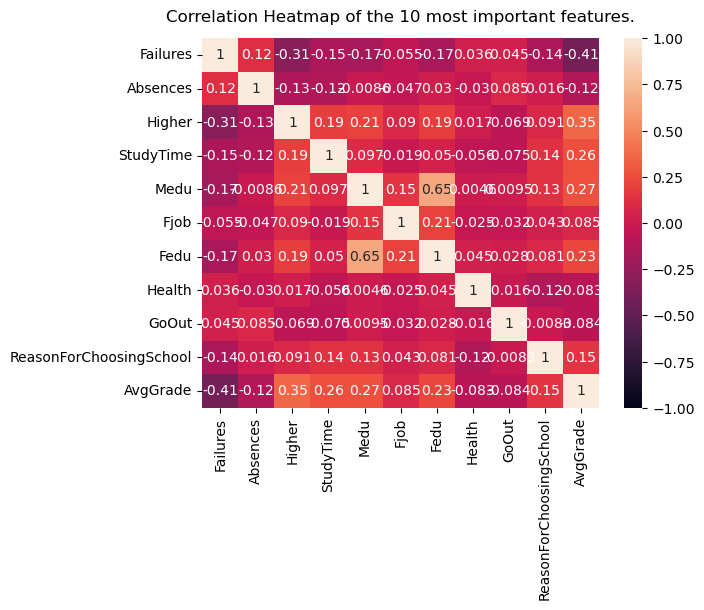

In [310]:
heatmap = sns.heatmap(top_10_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap of the 10 most important features.', fontdict={'fontsize':12}, pad=12);

#### Plotting the relationship between the Failures and AvgGrade

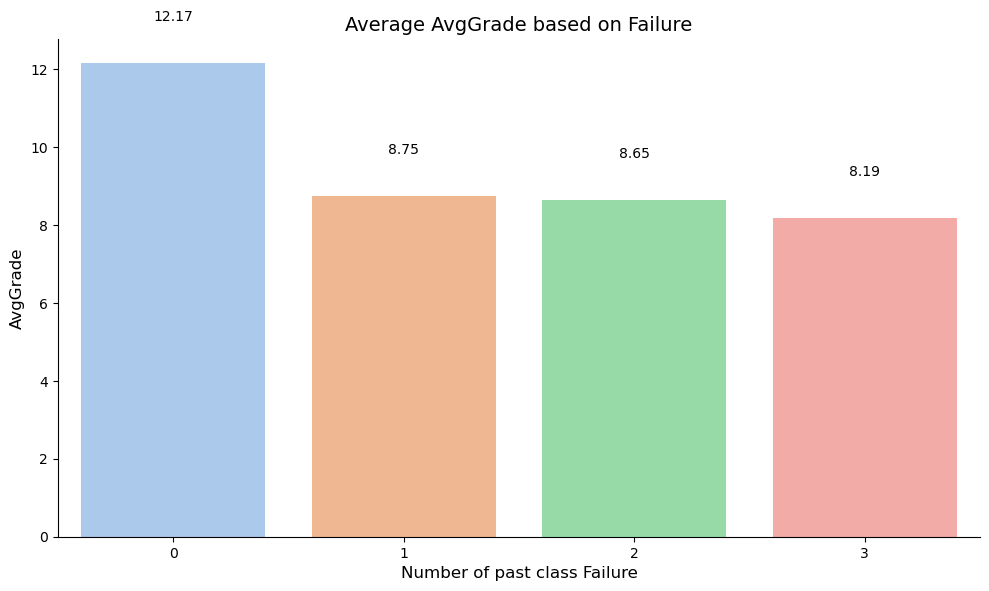

In [325]:
df_plot = pd.concat([X_train['Failures'], y_train], axis=1)
df_plot.columns = ['Failures', 'AvgGrade']


# Setting a custom color palette
custom_palette = sns.color_palette("pastel")

# Bar plot with enhanced aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(x='Failures', y='AvgGrade', data=df_plot, errorbar=None, palette=custom_palette)

# Adding labels and title
plt.xlabel('Number of past class Failure', fontsize=12)
plt.ylabel('AvgGrade', fontsize=12)
plt.title('Average AvgGrade based on Failure', fontsize=14)

# Adding value annotations on bars
for index, value in enumerate(df.groupby('Failures')['AvgGrade'].mean()):
    plt.text(index, value + 1, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Adjusting plot aesthetics
sns.despine()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

#### Does drinking alcohol influences student's grades ?

In [322]:
mapping = {0: "Very Low", 1: "Low", 2: "Medium", 3: "High", 4: "Very High"}


weekend_alc = X_train['Walc'].map(mapping)
daily_alc = X_train['Dalc'].map(mapping)

ValueError: 'c' argument has 5 elements, which is inconsistent with 'x' and 'y' with size 649.

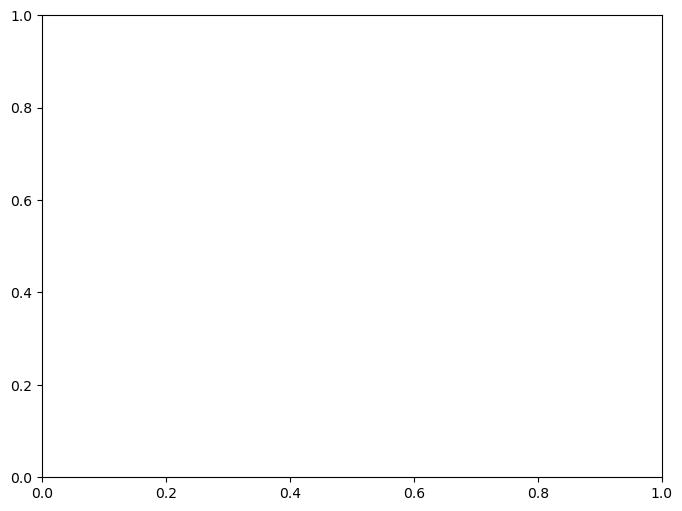

In [329]:
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'yellow', 'orange']  # Define colors for different 'Dalc' levels if needed
plt.scatter(df['G1'], df['G2'], c= colors, cmap='viridis', s=100, alpha=0.7)
plt.colorbar(label='Dalc')
plt.xlabel('Grade 1')
plt.ylabel('Grade 2')
plt.title('Scatter Plot of Grade1 and Grade2 with respect to Dalc')
plt.grid(True)
plt.show()

In [321]:
sum(null_values)

0

In [149]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

C:\Users\Tenzin Lhakpa\AppData\Local\Temp\ipykernel_4024\3052062780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
C:\Users\Tenzin Lhakpa\AppData\Local\Temp\ipykernel_4024\3052062780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
C:\Users\Tenzin Lhakpa\AppData\Local\Temp\ipykernel_4024\3052062780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [176]:
df['SchoolSup'].dtype == 'object'

True

In [177]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(f"{col} no of unique values are {pd.unique(df[col])}")
        
    
    


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

C:\Users\Tenzin Lhakpa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


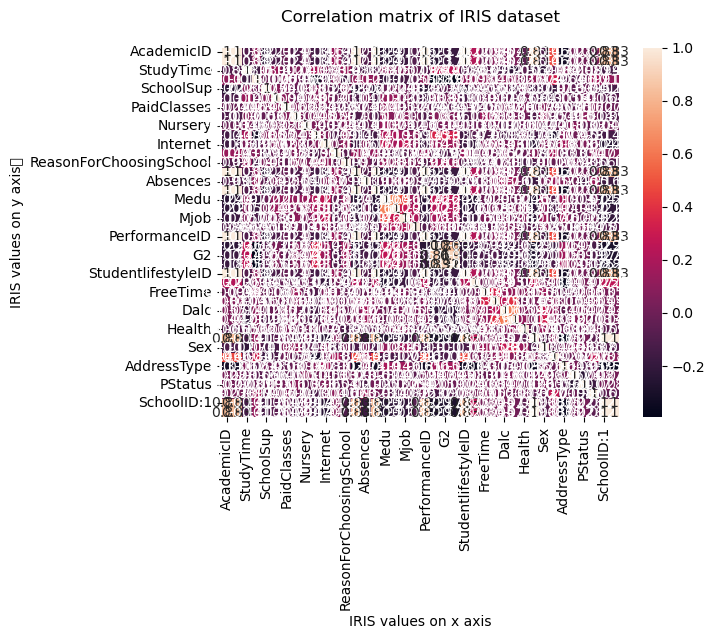

In [165]:
features = df.drop('AvgGrade', axis=1)

# Calculate the correlation matrix
correlation_matrix = features.corr()
heatmap = seaborn. heatmap(correlation_matrix, annot = True)  
heatmap.set (xlabel = 'IRIS values on x axis',ylabel = 'IRIS values on y axis\t', title = "Correlation matrix of IRIS dataset\n")  
pt. show () 

In [142]:
from sklearn import datasets  
import pandas as p  
import seaborn  
import matplotlib. pyplot as pt  

 
# dataframe = p. DataFrame (data = dataset. data, columns = dataset. feature_names)  
# dataframe ["AvgGrade"] = dataset. target  

correlation = df.corr ()  


ValueError: could not convert string to float: 'yes'

### Generating the model 

In [181]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# input layer
model.add(Dense(33,activation='relu'))

# hidden layers
model.add(Dense(33,activation='relu'))
model.add(Dense(33,activation='relu'))
model.add(Dense(33,activation='relu'))

# output layer
model.add(Dense(1))

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

model.compile(optimizer='adam',loss='mse')